In [ ]:
!pip install tensorflow pandas matplotlib scikit-learn

In [ ]:
import pandas as pd

# Load the dataset from the uploaded Excel file
df = pd.read_excel('ISCEV Control ERG Flinders University.xlsx')

# Preview the first few rows
df.head()


id  Test   age  Ethnic  vert      iris       Eye   a_time    a_amp  \
0     c1   LA3  14.5       2   2.0  1.141572  RightEye  11.3909 -5.23289   
1     c1   LA3  14.5       2   2.0  1.153924   LeftEye  11.3463 -3.98402   
2  c1000  30Hz   5.0       1   2.0  1.116472  RightEye      NaN      NaN   
3  c1000  30Hz   5.0       1   2.0  1.116472  RightEye      NaN      NaN   
4  c1000  30Hz   5.0       1   2.0  1.072432   LeftEye      NaN      NaN   

      b_time    b_amp  sex  OP_s_Amp  OP_s_Time  
0  29.126900  16.7272    0       NaN        NaN  
1  29.985200  18.8737    0       NaN        NaN  
2  26.763275  33.6818    1       NaN        NaN  
3  26.763275  33.6818    1       NaN        NaN  
4  26.763275  29.7059    1       NaN        NaN

In [ ]:
# Select relevant columns for ERG analysis
features = df[['a_amp', 'b_amp', 'a_time']]

# Check the selected features
features.head()


a_amp    b_amp   a_time
0 -5.23289  16.7272  11.3909
1 -3.98402  18.8737  11.3463
2      NaN  33.6818      NaN
3      NaN  33.6818      NaN
4      NaN  29.7059      NaN

In [ ]:
# Remove irrelevant columns
df_cleaned = df[['a_amp', 'b_amp', 'a_time']]

# Display the cleaned dataset
df_cleaned.head()


a_amp    b_amp   a_time
0 -5.23289  16.7272  11.3909
1 -3.98402  18.8737  11.3463
2      NaN  33.6818      NaN
3      NaN  33.6818      NaN
4      NaN  29.7059      NaN

In [ ]:
# Define conditions for schizophrenia
# You can modify the thresholds based on the actual data distribution and research findings
df['schizophrenia'] = ((df['a_amp'] < 30) & (df['b_amp'] < 50) & (df['a_time'] < 100)).astype(int)

# Check the first few rows to see the new 'schizophrenia' column
df[['a_amp', 'b_amp', 'a_time', 'schizophrenia']].head()


a_amp    b_amp   a_time  schizophrenia
0 -5.23289  16.7272  11.3909              1
1 -3.98402  18.8737  11.3463              1
2      NaN  33.6818      NaN              0
3      NaN  33.6818      NaN              0
4      NaN  29.7059      NaN              0

In [ ]:
# Set up features and target
X = df_cleaned[['a_amp', 'b_amp', 'a_time']]  # Features
y = df['schizophrenia']  # Target

# Proceed with the rest of the model development


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Select features and target (assume schizophrenia is labeled under the 'schizophrenia' column, you'll need to add this if not present)
X = df_cleaned[['a_amp', 'b_amp', 'a_time']]
y = df['schizophrenia']  # Replace with the actual target column if needed

# Normalize the feature values to a range of 0 to 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shapes of the training and test sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (532, 3)
Test set shape: (134, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model architecture
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # First hidden layer with 64 neurons
model.add(layers.Dense(32, activation='relu'))  # Second hidden layer with 32 neurons
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6049 - loss: nan - val_accuracy: 0.5794 - val_loss: nan
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6320 - loss: nan - val_accuracy: 0.5794 - val_loss: nan
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6040 - loss: nan - val_accuracy: 0.5794 - val_loss: nan
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5818 - loss: nan - val_accuracy: 0.5794 - val_loss: nan
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5833 - loss: nan - val_accuracy: 0.5794 - val_loss: nan
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6134 - loss: nan - val_accuracy: 0.5794 - val_loss: nan
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5875 - loss: nan - val_accuracy: 0.5794 - val_loss: nan
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6193 - loss: nan - val_accuracy: 0.5794 - val_loss: nan
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5787 - loss: nan 
Test Accuracy: 0.5746268630027771


In [ ]:
df['schizophrenia'].value_counts()


schizophrenia
0    398
1    268
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


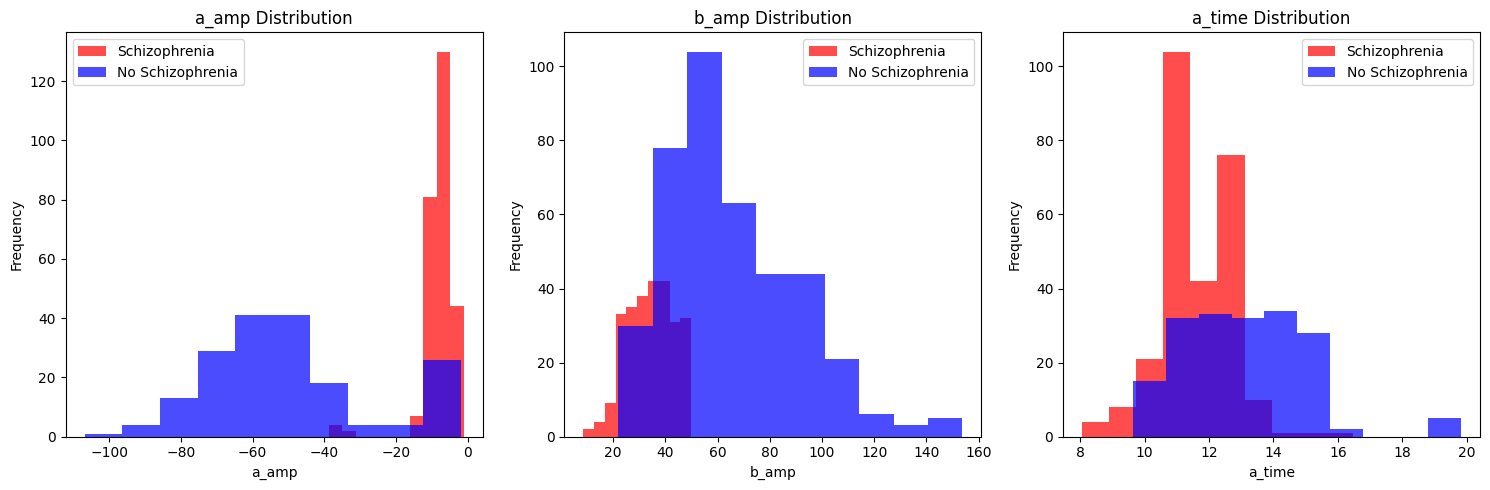

In [ ]:
# Separate patients with and without schizophrenia
schizophrenia_yes = df[df['schizophrenia'] == 1]
schizophrenia_no = df[df['schizophrenia'] == 0]

# Plot histograms
plt.figure(figsize=(15, 5))

# a_amp
plt.subplot(1, 3, 1)
plt.hist(schizophrenia_yes['a_amp'], alpha=0.7, label='Schizophrenia', color='red')
plt.hist(schizophrenia_no['a_amp'], alpha=0.7, label='No Schizophrenia', color='blue')
plt.title('a_amp Distribution')
plt.xlabel('a_amp')
plt.ylabel('Frequency')
plt.legend()

# b_amp
plt.subplot(1, 3, 2)
plt.hist(schizophrenia_yes['b_amp'], alpha=0.7, label='Schizophrenia', color='red')
plt.hist(schizophrenia_no['b_amp'], alpha=0.7, label='No Schizophrenia', color='blue')
plt.title('b_amp Distribution')
plt.xlabel('b_amp')
plt.ylabel('Frequency')
plt.legend()

# a_time
plt.subplot(1, 3, 3)
plt.hist(schizophrenia_yes['a_time'], alpha=0.7, label='Schizophrenia', color='red')
plt.hist(schizophrenia_no['a_time'], alpha=0.7, label='No Schizophrenia', color='blue')
plt.title('a_time Distribution')
plt.xlabel('a_time')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-31-7084b0cfbfb6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='schizophrenia', y='a_amp', data=df, palette='Set2')
<ipython-input-31-7084b0cfbfb6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='schizophrenia', y='b_amp', data=df, palette='Set2')
<ipython-input-31-7084b0cfbfb6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='schizophrenia', y='a_time', data=df, palette='Set2')


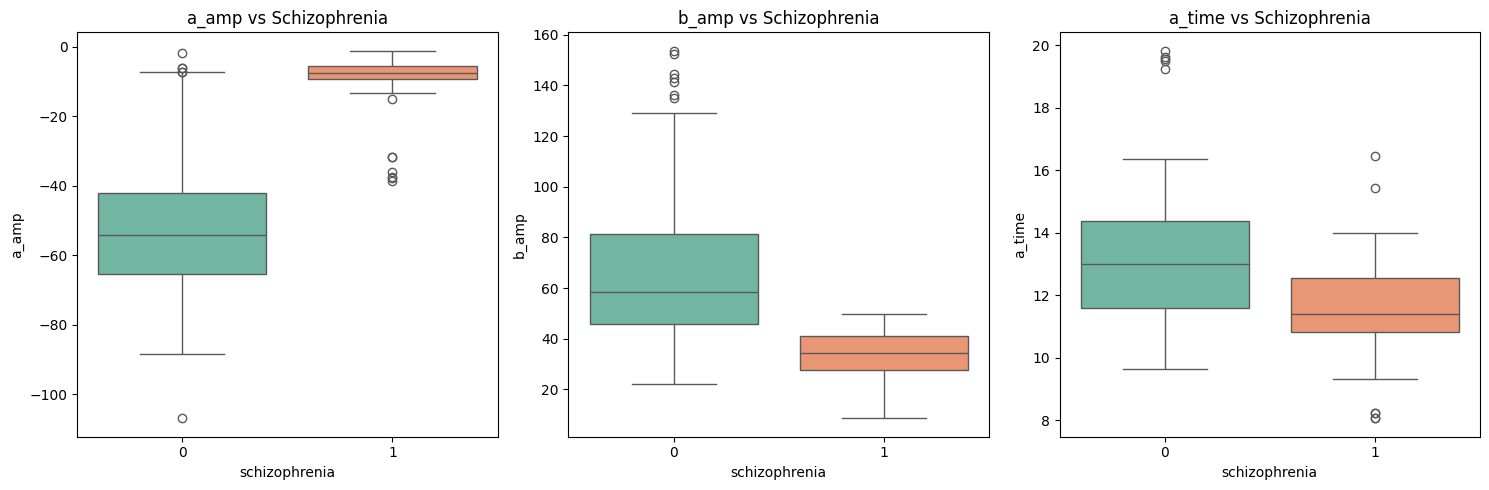

In [ ]:
plt.figure(figsize=(15, 5))

# a_amp
plt.subplot(1, 3, 1)
sns.boxplot(x='schizophrenia', y='a_amp', data=df, palette='Set2')
plt.title('a_amp vs Schizophrenia')

# b_amp
plt.subplot(1, 3, 2)
sns.boxplot(x='schizophrenia', y='b_amp', data=df, palette='Set2')
plt.title('b_amp vs Schizophrenia')

# a_time
plt.subplot(1, 3, 3)
sns.boxplot(x='schizophrenia', y='a_time', data=df, palette='Set2')
plt.title('a_time vs Schizophrenia')

plt.tight_layout()
plt.show()


<ipython-input-32-7084b0cfbfb6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='schizophrenia', y='a_amp', data=df, palette='Set2')
<ipython-input-32-7084b0cfbfb6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='schizophrenia', y='b_amp', data=df, palette='Set2')
<ipython-input-32-7084b0cfbfb6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='schizophrenia', y='a_time', data=df, palette='Set2')


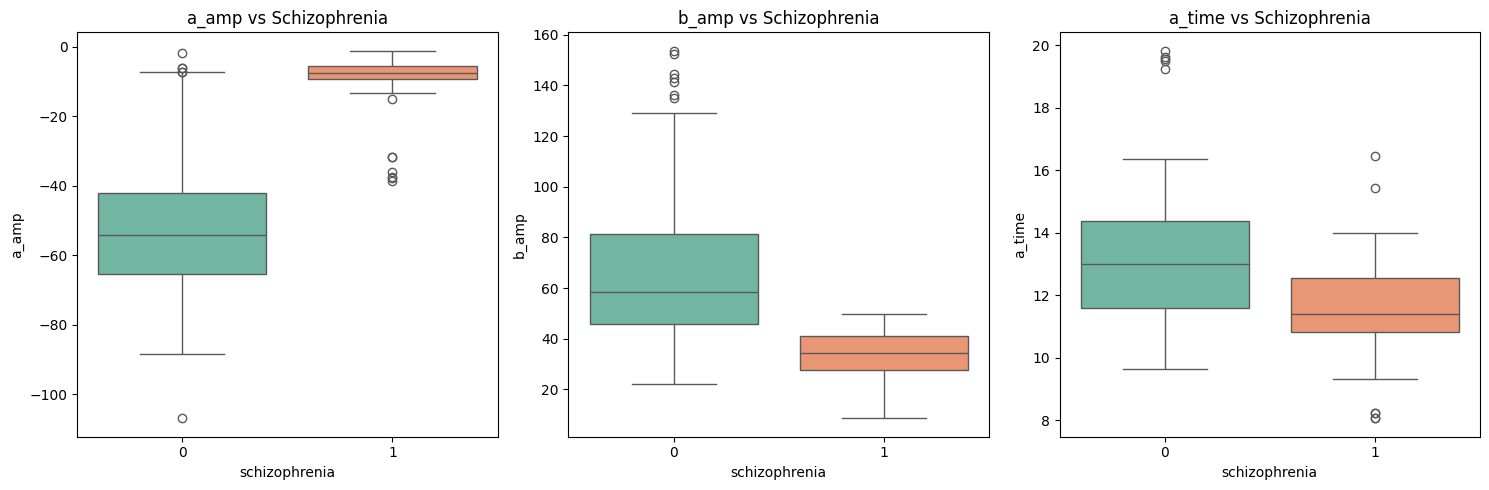

In [ ]:
plt.figure(figsize=(15, 5))

# a_amp
plt.subplot(1, 3, 1)
sns.boxplot(x='schizophrenia', y='a_amp', data=df, palette='Set2')
plt.title('a_amp vs Schizophrenia')

# b_amp
plt.subplot(1, 3, 2)
sns.boxplot(x='schizophrenia', y='b_amp', data=df, palette='Set2')
plt.title('b_amp vs Schizophrenia')

# a_time
plt.subplot(1, 3, 3)
sns.boxplot(x='schizophrenia', y='a_time', data=df, palette='Set2')
plt.title('a_time vs Schizophrenia')

plt.tight_layout()
plt.show()


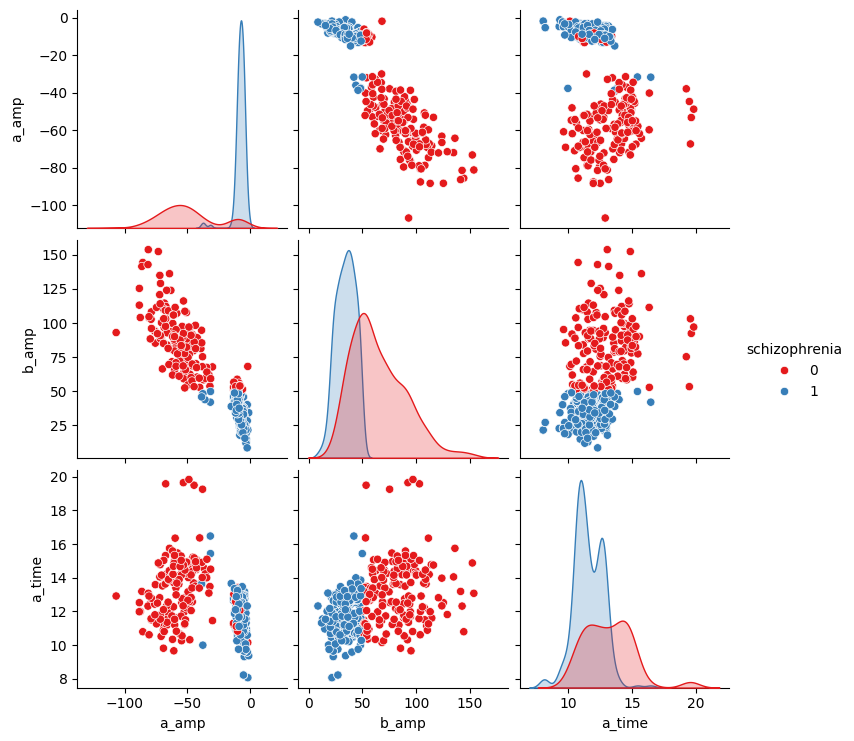

In [ ]:
# Pair plot for all features grouped by schizophrenia
sns.pairplot(df[['a_amp', 'b_amp', 'a_time', 'schizophrenia']], hue='schizophrenia', palette='Set1')
plt.show()


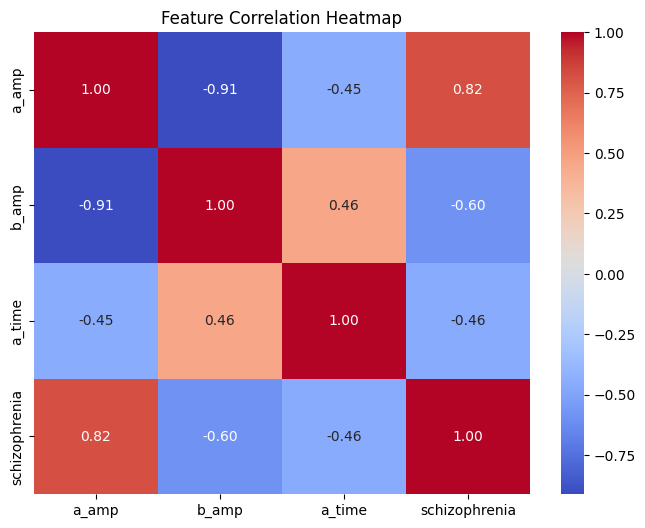

In [ ]:
# Compute correlation matrix
corr_matrix = df[['a_amp', 'b_amp', 'a_time', 'schizophrenia']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()
